In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random
from sklearn.datasets import load_iris #importation de la commande
irisData=load_iris()

(3, 2)


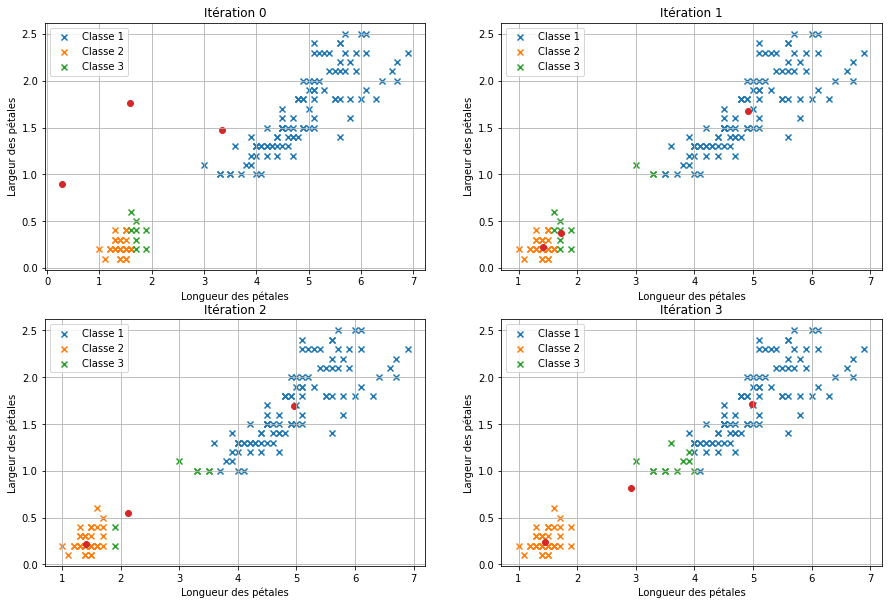

In [2]:
dataset = irisData.data
centers_length = np.random.rand(1,3)*np.max(dataset[:,2])
center_width = np.random.rand(1,3)*np.max(dataset[:,3])

def plot_centers(dataset, centers):
    plt.figure()
    plt.scatter(dataset[:,2], dataset[:,3], label="Specimens d'Iris", marker='x')
    plt.scatter(centers[:,0], centers[:,1])
    plt.xlabel("Longueur des pétales")
    plt.ylabel("Largeur des pétales")
    plt.grid()
    plt.legend()
    plt.show()

def plot_classes(classe_0, classe_1, classe_2, centers, ax):
    ax.scatter(classe_0[:,2], classe_0[:,3], label="Classe 1", marker='x')
    ax.scatter(classe_1[:,2], classe_1[:,3], label="Classe 2", marker='x')
    ax.scatter(classe_2[:,2], classe_2[:,3], label="Classe 3", marker='x')
    ax.scatter(centers[:,0], centers[:,1])
    ax.set_xlabel("Longueur des pétales")
    ax.set_ylabel("Largeur des pétales")
    ax.grid()
    ax.legend()

centers = np.vstack((centers_length, center_width)).T
print(centers.shape)

classe = np.zeros((150,))
for ui,i in enumerate(dataset[:,2:]):
    dist = [np.sum((c-i)**2) for c in centers]
    classe[ui] = np.argmin(dist)

classe_0 = dataset[np.where(classe == 0)]
classe_1 = dataset[np.where(classe == 1)]
classe_2 = dataset[np.where(classe == 2)]

#plot_classes(classe_0, classe_1, classe_2, centers)

fig, axes = plt.subplots(2,2, figsize=(15,10))
for counter in range(4):
    classe = np.zeros((150,))
    for ui,i in enumerate(dataset[:,2:]):
        dist = [np.sum((c-i)**2) for c in centers]
        classe[ui] = np.argmin(dist)
    classe_0 = dataset[np.where(classe == 0)]
    classe_1 = dataset[np.where(classe == 1)]
    classe_2 = dataset[np.where(classe == 2)]
    plot_classes(classe_0, classe_1, classe_2, centers, axes[counter//2, counter%2])
    axes[counter//2, counter%2].set_title(f"Itération {counter}")

    centers[0,:] = np.mean(classe_0[:,2:], axis=0)
    centers[1,:] = np.mean(classe_1[:,2:], axis=0)
    centers[2,:] = np.mean(classe_2[:,2:], axis=0)

plt.show()
